In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/Customer Dataset 2(in).csv"
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')


In [ ]:
print(df.head())
print(df.info())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id           

In [ ]:
rfm_data = df[['id', 'purchase_frequency', 'last_purchase_amount', 'membership_years','gender','preferred_category']]


In [ ]:
rfm_data['Recency'] = df['membership_years'].max() - df['membership_years']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None


In [ ]:
rfm_data['Frequency'] = df['purchase_frequency']
rfm_data['Monetary'] = df['last_purchase_amount']

<ipython-input-8-e5c581feb827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['Frequency'] = df['purchase_frequency']


In [ ]:
rfm_data['R_Score'] = pd.cut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.cut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.cut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

In [ ]:
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(int) + \
                         rfm_data['F_Score'].astype(int) + \
                         rfm_data['M_Score'].astype(int)

In [ ]:
segmentation_map = {
    (9, 10): 'Best Customers',
    (7, 8): 'Loyal Customers',
    (5, 6): 'Potential Customers',
    (3, 4): 'At Risk',
    (0, 1): 'Lost Customers'
}

In [ ]:
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    data.plot.pie(autopct='%1.1f%%', startangle=90, colormap='viridis')
    plt.title(title)
    plt.ylabel('')
    plt.show()

In [ ]:
rfm_data['Segment'] = rfm_data['RFM_Score'].apply(lambda x: next((v for k, v in segmentation_map.items() if k[0] <= x <= k[1]), 'Lost Customers'))

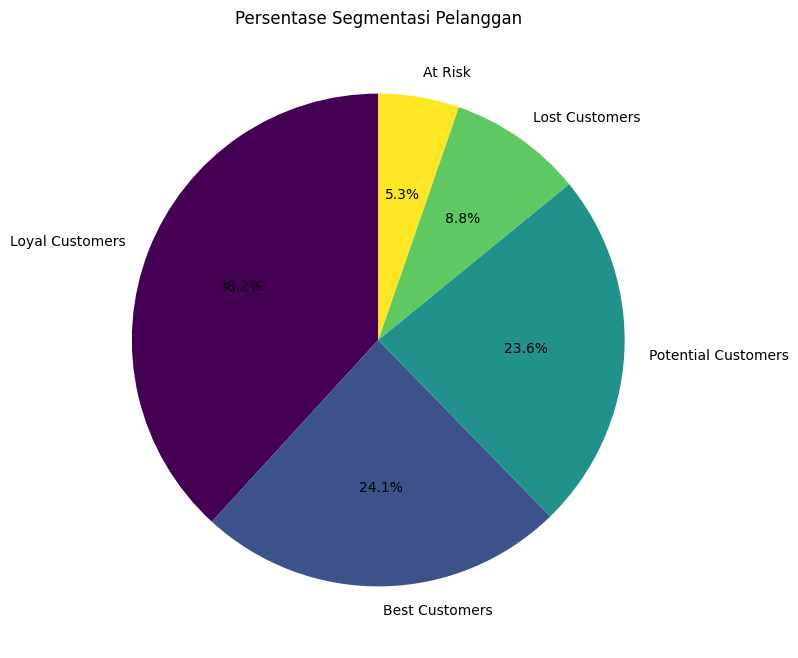

                     Jumlah  Persentase
Segment                                
Loyal Customers         382        38.2
Best Customers          241        24.1
Potential Customers     236        23.6
Lost Customers           88         8.8
At Risk                  53         5.3


In [ ]:
segment_counts = rfm_data['Segment'].value_counts()
rfm_data.rename(columns={'Gender': 'gender'}, inplace=True)
segment_counts = rfm_data['Segment'].value_counts()
segment_percentages = (segment_counts / segment_counts.sum()) * 100
plot_pie_chart(segment_percentages, "Persentase Segmentasi Pelanggan")
segment_summary = pd.DataFrame({'Jumlah': segment_counts, 'Persentase': segment_percentages})
print(segment_summary)

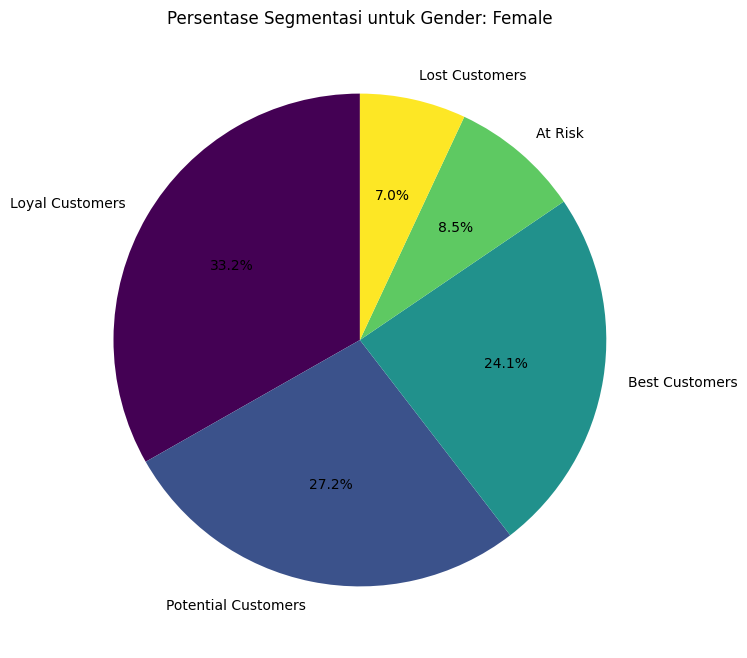

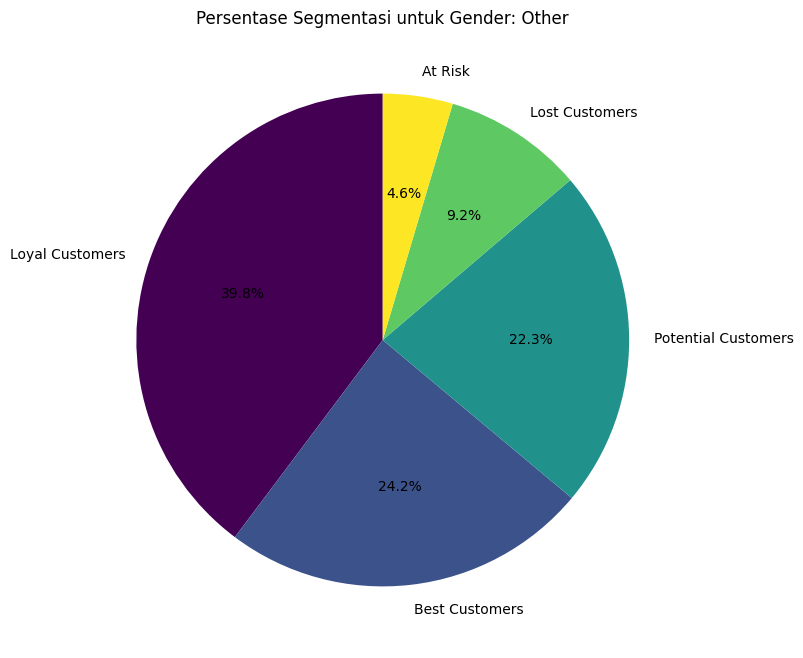

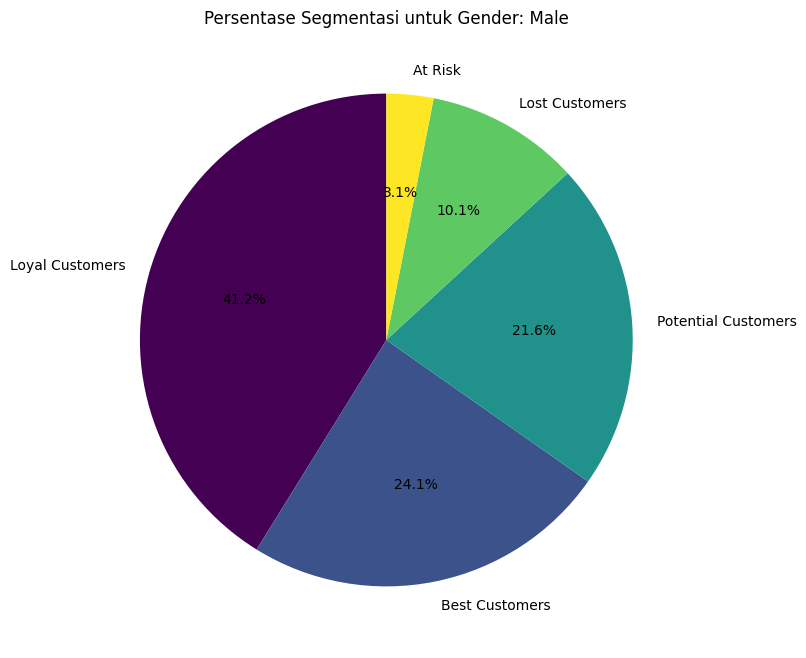

Segment   At Risk  Best Customers  Lost Customers  Loyal Customers  \
gender                                                               
Female   8.544304       24.050633        6.962025        33.227848   
Male     3.081232       24.089636       10.084034        41.176471   
Other    4.587156       24.159021        9.174312        39.755352   

Segment  Potential Customers  
gender                        
Female             27.215190  
Male               21.568627  
Other              22.324159  


In [ ]:
gender_segment_counts = rfm_data.groupby(['gender', 'Segment']).size().unstack()

for gender in rfm_data['gender'].unique():
    gender_data = rfm_data[rfm_data['gender'] == gender]['Segment'].value_counts(normalize=True) * 100
    plot_pie_chart(gender_data, f"Persentase Segmentasi untuk Gender: {gender}")

    gender_summary = rfm_data.groupby('gender')['Segment'].value_counts(normalize=True).unstack() * 100
print(gender_summary)

In [ ]:
print(rfm_data.head())

   id  purchase_frequency  last_purchase_amount  membership_years  gender  \
0   1                  24                113.53                 3  Female   
1   2                  42                 41.93                 2  Female   
2   3                  28                424.36                 2  Female   
3   4                   5                991.93                 9   Other   
4   5                  25                347.08                 3  Female   

  preferred_category  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0          Groceries        7         24    113.53       2       2       1   
1             Sports        8         42     41.93       1       4       1   
2           Clothing        8         28    424.36       1       3       2   
3      Home & Garden        1          5    991.93       4       1       4   
4        Electronics        7         25    347.08       2       2       2   

   RFM_Score              Segment  
0          5  Potential Customer